In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

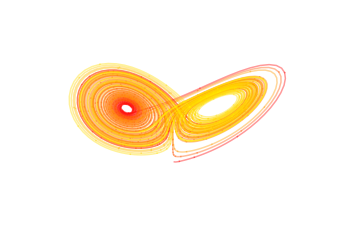

In [37]:
# sistema de ecuaciones
def df_dt(x, t, s, r, b):
    
    dx = - s * x[0] + s * x[1]
    dy = r * x[0] - x[1] - x[2]* x[0]
    dz = x[0] * x[1] - b * x[2]

    return np.array([dx, dy, dz])
# Parámetros 
s = 10 # sigma
r = 28 
b = 8/3

# Condiciones iniciales
x0 = 0
y0 = 1
z0 = 0
conds_iniciales = np.array([x0, y0, z0])

# Condiciones para integración
tf = 100
N = 10000
t = np.linspace(0, tf, N)
solucion = odeint(df_dt, conds_iniciales, t, args=(s, r, b))
# Plot the Lorenz attractor using a Matplotlib 3D projection
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
c = np.linspace(0,1,N)
x = solucion[:,0]
y = solucion[:,1]
z = solucion[:,2]
for i in range(0,N-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()

plt.show()